<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/13_1_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fashion MNIST 데이터셋으로 Confusion Matrix를 그려봅시다


In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# fashion mnist로 비교해봅시다

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']     

num_classes = len(class_names)

In [4]:
epochs = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_true = y_test
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train/255
x_test = x_test/255

from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

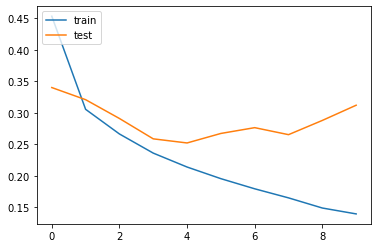

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

In [6]:
y_pred = model.predict(x_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [7]:
y_pred.shape

(10000, 10)

In [8]:
y_pred[0]

array([9.8540563e-16, 1.1317050e-16, 4.2788986e-18, 8.9117044e-17,
       2.3727902e-16, 4.6390637e-13, 3.2800980e-16, 8.1037461e-09,
       1.7532720e-18, 1.0000000e+00], dtype=float32)

In [9]:
y_pred = tf.argmax(y_pred, axis=-1)

In [10]:
y_pred.shape

TensorShape([10000])

In [11]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 


https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix

In [12]:
confusion_mtx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[842,   0,   8,  22,   4,   1, 113,   0,  10,   0],
       [  1, 966,   2,  21,   4,   0,   5,   0,   1,   0],
       [ 17,   0, 829,   9,  70,   0,  74,   0,   1,   0],
       [ 11,   2,   6, 944,  15,   0,  21,   0,   1,   0],
       [  0,   0,  52,  38, 855,   0,  55,   0,   0,   0],
       [  0,   0,   0,   0,   0, 968,   0,  16,   0,  16],
       [ 87,   0,  48,  22,  59,   0, 774,   0,  10,   0],
       [  0,   0,   0,   0,   0,   3,   0, 987,   0,  10],
       [  4,   0,   1,   3,   1,   1,   2,   3, 985,   0],
       [  0,   0,   0,   0,   0,   4,   0,  36,   0, 960]])>

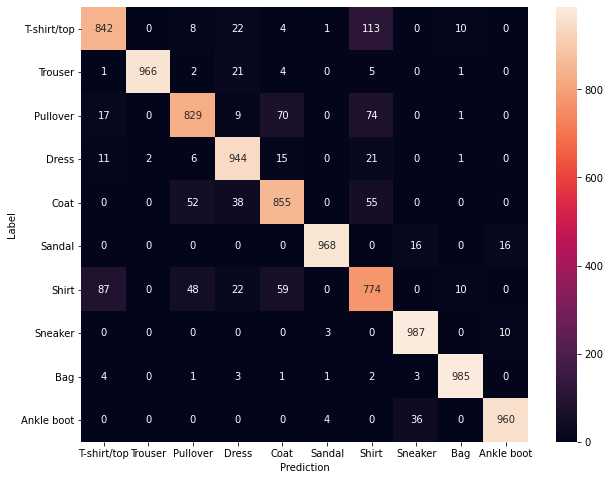

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=class_names, yticklabels=class_names, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

seaborn heatmap 

https://seaborn.pydata.org/generated/seaborn.heatmap.html

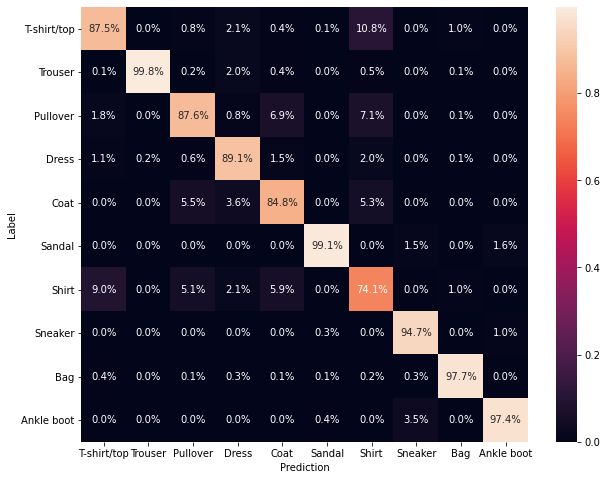

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx/sum(confusion_mtx), xticklabels=class_names, yticklabels=class_names, 
            annot=True, fmt='.1%')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()